In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
 

In [ ]:
df = pd.read_csv('./sales_data.csv')

In [ ]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


# **Qeustion** **1** : What was the best month for sale? How much was earned that month?








1.Clean up data from missing (NaN) values :



In [ ]:
df = df.dropna(how='all')
df.head()



2.Sepereting date values with 'Or' for preventing from the error that we want to convert type of date column values, from string to integer : 



In [ ]:
df=df[df['Order Date'].str[0:2]!='Or']
df['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object



3.Add month column : 





In [ ]:
df['Month']=df['Order Date'].str[0:2]
df['Month']

0         04
2         04
3         04
4         04
5         04
          ..
186845    09
186846    09
186847    09
186848    09
186849    09
Name: Month, Length: 185950, dtype: object




5.Converting type of Month column values from string to integer : 




In [ ]:
df['Month']=df['Month'].astype('int16')

6.Change two column data type from string to float and integer (for creating Total Price column):

In [ ]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int16')
df['Price Each'] = df['Price Each'].astype('float16')

7.Add total price column which is the product of Quantity Ordered multiple by Price Each values : 


In [ ]:
df['Total Price'] = df['Quantity Ordered']*df['Price Each']

8.Grouping data frame by 'Month' column and get the sum of Total Price in every month and sorting them from descending order:

In [ ]:
result = df.groupby('Month').sum()['Total Price'].sort_values(ascending=False)
result

9.Ploting the result and as we can see , the best seller month is december and it make sense maybe becouse of christmas !!

In [ ]:
x=result.index
y =result.values
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Months')
plt.ylabel('Sales in Million USD($)')
plt.show()

# **Question** **2** : which city had the most number of sales ?



1.Add city column , also this column includes state name 



In [ ]:
df['City']=df['Purchase Address']
df['City'] = df['City'].apply(
    lambda x: x.split(',')[1]+' '+x.split(',')[2].split(' ')[1])


2.Grouping data frame by 'City' column and get the sum of 'Total Price' column for each city :

In [ ]:
result = df.groupby('City').sum()['Total Price']
result

3.Ploting into a bar chart for better and clear vision : 

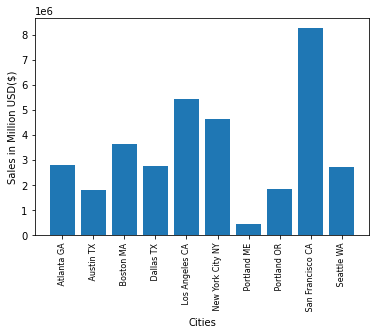

In [ ]:
x = result.index
y = result.values
plt.bar(x,y)
plt.xticks(x,rotation='vertical',size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in Million USD($)')
plt.show()

# **Question** **3** : what is the best time for showing our advertisements, in order to maximize the possibility of customer's buying product?

1.Converting the type of 'Order Date' column into date time object :

In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'])

2.Access to the hour of purchase by adding new column called 'Hour':

In [ ]:
df['Hour']=df['Order Date'].dt.hour
df

3.Grouping data frame by the hour of purchase and plot it into a line chart :

In [ ]:
result = df.groupby('Hour').count()['Total Price']

4.As you can see the plot, the best time for showing adversite might be around 9am and 7pm :

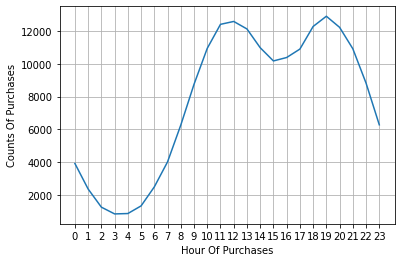

In [ ]:
x = result.index
y = result.values
plt.plot(x,y)
plt.grid()
plt.xlabel('Hour Of Purchases')
plt.ylabel('Counts Of Purchases')
plt.xticks(x)
plt.show()

# **Question** **4** : What products sold the most ?

1.Grouping data frame by 'Product' column and get the quantity of every product and add them up : 

In [ ]:
result=df.groupby('Product').sum()['Quantity Ordered']
result

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int16

2.Ploting into a bar chart , as we can see the best seller product can be 'AAA Batterries' 

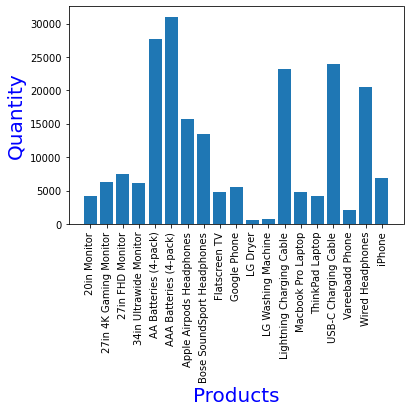

In [ ]:
x = result.index
y = result.values
plt.bar(x,y)
plt.xticks(x,rotation='vertical')
plt.xlabel('Products',size=20,color='b')
plt.ylabel('Quantity',size=20,color='b')
plt.show()

# **Question** **5** : This question is basicly associated with previous one ,as a data analys  i wanna prove that why 'AAA Batterries' are the best seller products ? which reason was effective on this product to be a most sold product ?

1.Getting each price of each products : 


In [ ]:
prices = df.groupby('Product').mean()['Total Price']


Product
20in Monitor                   110.751038
27in 4K Gaming Monitor         390.876404
27in FHD Monitor               150.859192
34in Ultrawide Monitor         381.106628
AA Batteries (4-pack)            5.156927
AAA Batteries (4-pack)           4.493392
Apple Airpods Headphones       151.080460
Bose SoundSport Headphones     100.990616
Flatscreen TV                  301.187500
Google Phone                   600.760193
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        16.029490
Macbook Pro Laptop            1701.439453
ThinkPad Laptop               1000.484497
USB-C Charging Cable            13.083878
Vareebadd Phone                400.581116
Wired Headphones                13.056001
iPhone                         700.716187
Name: Total Price, dtype: float32

2.Plotting two y axis in matplotlib (for quantities and each price).accourding to the plot ,whenever price of a specific product is high, the quantity of orders will be low and that's why 'AAA Batterries' are most sold , becouse they're cheap !! **notice** that this is just one reason,this can also have several reasons that they're effective on product quantity order. 

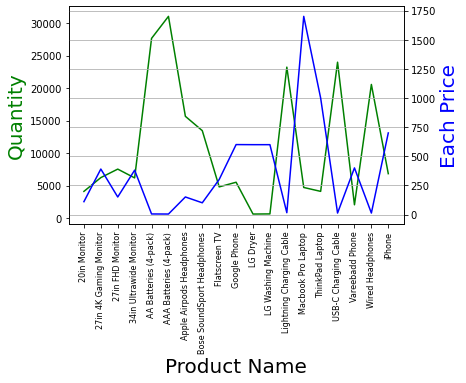

In [ ]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x,y,color='g')
ax2.plot(x,prices,'b-')
ax1.set_xticklabels(x,rotation='vertical',size=8)
ax1.set_xlabel('Product Name',size=20)
ax1.set_ylabel('Quantity',size=20,color='green')
ax2.set_ylabel('Each Price',size=20,color='blue')
plt.grid()

plt.show()